<a href="https://colab.research.google.com/github/jproctor-rebecca/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/GradientDescent_TensorFLow_SGD_JC_LectureNotes_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

## TensorFlow/Keras Learning Goals
*  Intro TensorFlow KerasAPI
*  Show example of training model
*  discuss Gradient Descent
*  optional: investigate the TensorFlow/Keras code for Dense Layers

In [2]:
# dense - layer that has connections between layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam


## Neural Netowork - Workflow

1. import tensorflow
2. define a model
3. compile the model
4. fit the model
5. evaluate the model


In [3]:
# predict 10 categories (output)

# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [5]:
# load data
from tensorflow.keras.datasets import mnist

# split data train/test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

1


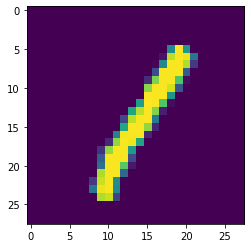

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[23]);
print(y_train[23])

In [8]:
# flatten values
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

In [9]:
# fit data to model

model.fit(X_train,
          y_train, 
          epochs=25,
          validation_data=(X_test, y_test)
          )

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1859 - accuracy: 0.2810 - val_loss: 2.0836 - val_accuracy: 0.3956
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0026 - accuracy: 0.3930 - val_loss: 1.9083 - val_accuracy: 0.3881
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8291 - accuracy: 0.4629 - val_loss: 1.7474 - val_accuracy: 0.5054
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6842 - accuracy: 0.5008 - val_loss: 1.6179 - val_accuracy: 0.4911
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5607 - accuracy: 0.5238 - val_loss: 1.5718 - val_accuracy: 0.4496
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4733 - accuracy: 0.5307 - val_loss: 1.4208 - val_accuracy: 0.6076
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3977 - accuracy: 0.6397 - val_loss: 1.3794 - val_accuracy:

  ## Stochastic Gradient Descent
  *  Batches - the number of observations the model is shown to make predictions and update weights; batches are selected randomly during epoch; all observations are considered when passing through an epoch at some point
*  smaller batch size = slower runtime (but maybe more accurate results)
* default batch = balance between speed and accuracy
* large batch = verry fast but not nearly as accurate
  *  Learning Rate
  *  Evaluation

In [10]:
model_sgd = SGD(
    learning_rate=0.01,
)

## Default Experiment

In [11]:
# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )


In [12]:
# fit data to model
bt_default = model.fit(X_train,
                      y_train, 
                      epochs=25,
                      batch_size=32,
                      validation_data=(X_test, y_test)
                      )


Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1878 - accuracy: 0.3282 - val_loss: 2.0871 - val_accuracy: 0.4702
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0018 - accuracy: 0.4697 - val_loss: 1.9052 - val_accuracy: 0.4731
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8279 - accuracy: 0.4838 - val_loss: 1.7311 - val_accuracy: 0.4942
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6811 - accuracy: 0.4956 - val_loss: 1.6259 - val_accuracy: 0.4936
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5794 - accuracy: 0.5023 - val_loss: 1.5230 - val_accuracy: 0.5275
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5101 - accuracy: 0.5170 - val_loss: 1.4624 - val_accuracy: 0.5711
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4525 - accuracy: 0.5538 - val_loss: 1.4029 - val_accuracy:

## Small Batch Experiment

In [13]:
# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )


In [14]:
# fit data to model
bt_small = model.fit(X_train,
                      y_train, 
                      epochs=25,
                      batch_size=8,
                      validation_data=(X_test, y_test)
                      )

Epoch 1/25
60000/60000 [==============================] - 101s 2ms/step - loss: 2.1365 - accuracy: 0.1870 - val_loss: 2.0470 - val_accuracy: 0.2066
Epoch 2/25
60000/60000 [==============================] - 103s 2ms/step - loss: 2.0920 - accuracy: 0.1949 - val_loss: 2.0250 - val_accuracy: 0.2085
Epoch 3/25
60000/60000 [==============================] - 101s 2ms/step - loss: 2.1690 - accuracy: 0.1584 - val_loss: 2.1508 - val_accuracy: 0.1664
Epoch 4/25
60000/60000 [==============================] - 101s 2ms/step - loss: 2.1277 - accuracy: 0.1724 - val_loss: 2.0715 - val_accuracy: 0.1937
Epoch 5/25
60000/60000 [==============================] - 102s 2ms/step - loss: 2.0861 - accuracy: 0.1971 - val_loss: 2.0711 - val_accuracy: 0.2067
Epoch 6/25
60000/60000 [==============================] - 102s 2ms/step - loss: 2.0672 - accuracy: 0.2035 - val_loss: 2.0457 - val_accuracy: 0.2108
Epoch 7/25
60000/60000 [==============================] - 102s 2ms/step - loss: 2.0318 - accuracy: 0.2065 - val_

## Large Batch Experiment

In [15]:
# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )

In [16]:
# fit data to model
bt_large = model.fit(X_train,
                      y_train, 
                      epochs=25,
                      batch_size=500,
                      validation_data=(X_test, y_test)
                      )

Epoch 1/25
600/600 [==============================] - 1s 2ms/step - loss: 2.2934 - accuracy: 0.1027 - val_loss: 2.2452 - val_accuracy: 0.1302
Epoch 2/25
600/600 [==============================] - 1s 2ms/step - loss: 2.2245 - accuracy: 0.2043 - val_loss: 2.2039 - val_accuracy: 0.3568
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 2.1791 - accuracy: 0.3565 - val_loss: 2.1502 - val_accuracy: 0.3659
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 2.1241 - accuracy: 0.3715 - val_loss: 2.0931 - val_accuracy: 0.3758
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 2.0632 - accuracy: 0.3776 - val_loss: 2.0296 - val_accuracy: 0.3731
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 1.9977 - accuracy: 0.3891 - val_loss: 1.9665 - val_accuracy: 0.3935
Epoch 7/25
600/600 [==============================] - 1s 2ms/step - loss: 1.9321 - accuracy: 0.3837 - val_loss: 1.9018 - val_accuracy: 0.3846
Epoch 

## Visualize Results

In [20]:
import seaborn as sns
import pandas as pd

In [18]:
# # create dataframe containing batch results
# results = pd.Dataframe()

# for r in enumerate([bt_default, bt_small, bt_large]):

#   temp = pd.Datafram.from_dict(r.history)
#   temp['epoch'] = temp.index.values
#   temp['model'] = i

#   results.append(temp, ignore_index=True)

# results.head()


In [23]:
# create dataframe containing batch results
default = pd.DataFrame.from_dict(bt_default.history)
default['epoch'] = default.index.values
default['batch_size'] = 'default 32'

small = pd.DataFrame.from_dict(bt_small.history)
small['epoch'] = small.index.values
small['batch_size'] = 'small 8'

large = pd.DataFrame.from_dict(bt_large.history)
large['epoch'] = large.index.values
large['batch_size'] = 'large 500'

results = pd.concat([default, small, large])
results['batch_size'] = results['batch_size'].astype('str')
results.head()

,loss,accuracy,val_loss,val_accuracy,epoch,batch_size
0,2.187817,0.328217,2.087076,0.4702,0,default 32
1,2.001764,0.469650,1.905215,0.4731,1,default 32
2,1.827909,0.483800,1.731128,0.4942,2,default 32
3,1.681106,0.495600,1.625873,0.4936,3,default 32
4,1.579352,0.502300,1.523010,0.5275,4,default 32


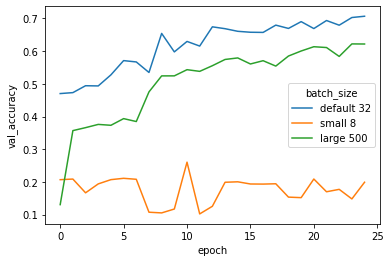

In [24]:
# map results of learning rate 0.01 for default, small, & large batch sizes

sns.lineplot(x='epoch', y='val_accuracy', hue='batch_size', data=results);


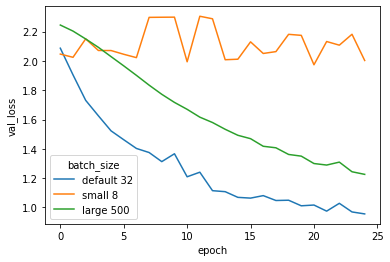

In [25]:

sns.lineplot(x='epoch', y='val_loss', hue='batch_size', data=results);


## Learning Rate
controls the size of the update to our weights that the optimization algorithim makes
*  when too high - causes unstable results
*  when too low - learning rate will never 'converge'
*  Goldy Locks paramater (it needs to be just right)

repeat same experiment with diferent learning rates
*  High learning rate - 0.75
*  Default learning rate - 0.01
*  Low learning rate - 0.0001



## Default Learning Rate

In [26]:
model_sgd = SGD(
    learning_rate=0.01,
)

In [27]:
# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )

In [28]:
# fit data to model
lr_default = model.fit(X_train,
                      y_train, 
                      epochs=25,
                      batch_size=64,
                      validation_data=(X_test, y_test)
                      )

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 2.2319 - accuracy: 0.2019 - val_loss: 2.1503 - val_accuracy: 0.3078
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 2.1056 - accuracy: 0.3587 - val_loss: 2.0557 - val_accuracy: 0.3937
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0096 - accuracy: 0.4004 - val_loss: 1.9624 - val_accuracy: 0.4056
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 1.9170 - accuracy: 0.4370 - val_loss: 1.8687 - val_accuracy: 0.4495
Epoch 5/25
938/938 [==============================] - 2s 2ms/step - loss: 1.8320 - accuracy: 0.4536 - val_loss: 1.7869 - val_accuracy: 0.4598
Epoch 6/25
938/938 [==============================] - 2s 2ms/step - loss: 1.7529 - accuracy: 0.4735 - val_loss: 1.7086 - val_accuracy: 0.4700
Epoch 7/25
938/938 [==============================] - 2s 2ms/step - loss: 1.6844 - accuracy: 0.4772 - val_loss: 1.6401 - val_accuracy: 0.5414
Epoch 

## High Learning Rate

In [29]:
model_sgd = SGD(
    learning_rate=0.75,
)

In [30]:
# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )

In [32]:
# fit data to model
lr_high = model.fit(X_train,
                      y_train, 
                      epochs=25,
                      batch_size=64,
                      validation_data=(X_test, y_test)
                      )

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 1.0366 - accuracy: 0.6706 - val_loss: 1.0023 - val_accuracy: 0.6810
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 1.0191 - accuracy: 0.6792 - val_loss: 1.0281 - val_accuracy: 0.6721
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 1.0191 - accuracy: 0.6876 - val_loss: 1.0130 - val_accuracy: 0.7138
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 0.9870 - accuracy: 0.6902 - val_loss: 0.9804 - val_accuracy: 0.6847
Epoch 5/25
938/938 [==============================] - 2s 2ms/step - loss: 0.9859 - accuracy: 0.7134 - val_loss: 0.9634 - val_accuracy: 0.7007
Epoch 6/25
938/938 [==============================] - 2s 2ms/step - loss: 0.9686 - accuracy: 0.6949 - val_loss: 0.9436 - val_accuracy: 0.6972
Epoch 7/25
938/938 [==============================] - 2s 2ms/step - loss: 0.9978 - accuracy: 0.6977 - val_loss: 0.9374 - val_accuracy: 0.7265
Epoch 

## Low Learning Rate

In [33]:
model_sgd = SGD(
    learning_rate=0.0001,
)

In [34]:
# instantiate model
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])


# compile model
model.compile(optimizer=SGD(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']
               )

In [35]:
# fit data to model
lr_low = model.fit(X_train,
                      y_train, 
                      epochs=25,
                      batch_size=64,
                      validation_data=(X_test, y_test)
                      )

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 2.2720 - accuracy: 0.1525 - val_loss: 2.2087 - val_accuracy: 0.2033
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 2.1673 - accuracy: 0.2095 - val_loss: 2.1242 - val_accuracy: 0.2161
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0750 - accuracy: 0.2210 - val_loss: 2.0269 - val_accuracy: 0.2782
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 1.9799 - accuracy: 0.2844 - val_loss: 1.9377 - val_accuracy: 0.2925
Epoch 5/25
938/938 [==============================] - 2s 2ms/step - loss: 1.8918 - accuracy: 0.3079 - val_loss: 1.8549 - val_accuracy: 0.3323
Epoch 6/25
938/938 [==============================] - 2s 2ms/step - loss: 1.8190 - accuracy: 0.3489 - val_loss: 1.7875 - val_accuracy: 0.3657
Epoch 7/25
938/938 [==============================] - 2s 2ms/step - loss: 1.7588 - accuracy: 0.3666 - val_loss: 1.7302 - val_accuracy: 0.3672
Epoch 

## Visualize Results

In [45]:
# create dataframe containing batch results
default = pd.DataFrame.from_dict(bt_default.history)
default['epoch'] = default.index.values
default['lr_level'] = 'default 0.01'

low = pd.DataFrame.from_dict(bt_small.history)
low['epoch'] = low.index.values
low['lr_level'] = 'low 0.0001'

high = pd.DataFrame.from_dict(lr_high.history)
high['epoch'] = high.index.values
high['lr_level'] = 'high 0.75'

results_lr = pd.concat([default, low, high])
results_lr['lr_level'] = results_lr['lr_level'].astype('str')
results_lr.head()

,loss,accuracy,val_loss,val_accuracy,epoch,lr_level
0,2.187817,0.328217,2.087076,0.4702,0,default 0.01
1,2.001764,0.469650,1.905215,0.4731,1,default 0.01
2,1.827909,0.483800,1.731128,0.4942,2,default 0.01
3,1.681106,0.495600,1.625873,0.4936,3,default 0.01
4,1.579352,0.502300,1.523010,0.5275,4,default 0.01


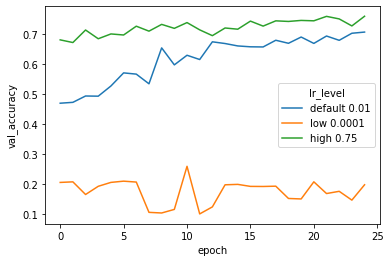

In [47]:
# map results of batch size 64 for default, low, & high learning rates

sns.lineplot(x='epoch', y='val_accuracy', hue='lr_level', data=results_lr);


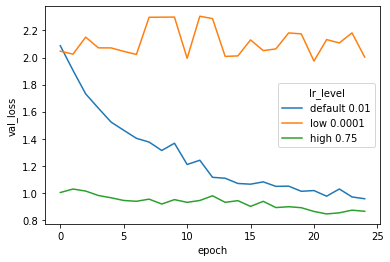

In [48]:
sns.lineplot(x='epoch', y='val_loss', hue='lr_level', data=results_lr);
